# Finding the Source of Happiness
## ... with the Sommerville  Happiness Dataset

Jupyter Notebook Shortcuts:

| <span style="color:blue">Command Mode (Blue border on left)</span>   |   | <span style="color:green">Code Edit Mode (Green border on left)</span> | |
|-----------------------|-------|------------------------|-------------|
| Switch to Code Edit Mode   | Enter | Switch to command mode | Esc         |
| Create new cell above | a     | **Execute cell**           | **Ctrl+Enter**  |
| **Create new cell below** | **b**     | Comment or Uncomment   | Ctrl + /    |
| Copy cell             | c     | Indent row             | Tab         |
| Paste cell            | v     | Out-dent row           | Shift + Tab |
| Delete                | x     |                        |             |

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm, tree, preprocessing, metrics, model_selection
import sklearn.ensemble as ske

The City of Somerville sends out a happiness survey to a random sample of Somerville residents asking them to rate their personal happiness and their satisfaction with City services. This combined dataset includes the survey responses from 2011, 2013, and 2015

https://catalog.data.gov/dataset?tags=happiness

In [2]:
# Many invalid values e.g. dates in happiness rating column.
happiness_df_all_years = pd.read_csv('happiness.csv', na_values = ['NA', 'X', 'R', 'r', 'x', '3f', 'f', 'F', '5/19/2011','6/1/2011', '6/6/2011', '108', '`0', ])
happiness_df = happiness_df_all_years[happiness_df_all_years['Year'] == 2011]

In [3]:
happiness_df.describe()

,Combined_ID,Year,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,The.availability.of.affordable.housing_2011,How.would.you.rate.the.following..The.cost.of.housing.,How.would.you.rate.the.following..The.overall.quality.of.public.schools.,How.would.you.rate.the.following..The.beauty.or.physical.setting_2011,How.would.you.rate.the.following..The.beauty.or.physical.setting.of.Somerville_2013,...,How.would.you.rate.the.following..The.maintenance.of.streets..sidewalks..and..squares_2013,How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks_2015,How.would.you.rate.the.following..The.availability.of.social.community.events,How.safe.do.you.feel.walking.in.your.neighborhood.at.night_2013,How.safe.do.you.feel.walking.in.your.community.at.night._2015,How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood.,How.satisfied.are.you.with.the.appearance.of.parks.in.your.neighborhood._2013,How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood.,Ward,Precinct
count,6167.000000,6167.0,0.0,0.0,0.0,5664.000000,0.0,0.0,5891.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3462.000000,2011.0,NaN,NaN,NaN,2.962571,NaN,NaN,3.216941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1780.403887,0.0,NaN,NaN,NaN,1.034293,NaN,NaN,1.360038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,379.000000,2011.0,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1920.500000,2011.0,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3462.000000,2011.0,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5003.500000,2011.0,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6545.000000,2011.0,NaN,NaN,NaN,7.000000,NaN,NaN,33.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
happiness_df.head(10)

,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
378,379.0,2011,10,10,10,10,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18+,"Less than $10,000",NaN,NaN,NaN,NaN
379,380.0,2011,8,9,9,7,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0-5 Years,"70,000 - $79,999",NaN,NaN,NaN,NaN
380,381.0,2011,7,7,8,7,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18+,"10,000 - $19,999",NaN,NaN,NaN,NaN
381,382.0,2011,9,7,10,6,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18+,"50,000 - $59,999",NaN,NaN,NaN,NaN
382,383.0,2011,4,4,6,8,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0-5 Years,"20,000 - $29,999",NaN,NaN,NaN,NaN
383,384.0,2011,8,8,9,7,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0-5 Years,"50,000 - $59,999",NaN,NaN,NaN,NaN
384,385.0,2011,3,4,8,8,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18+,"30,000 - $39,999",NaN,NaN,NaN,NaN
385,386.0,2011,6,7,8,7,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0-5 Years,"60,000 - $69,999",NaN,NaN,NaN,NaN
386,387.0,2011,7,7,6,7,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0-5 Years,"80,000 - $89,999",NaN,NaN,NaN,NaN
387,388.0,2011,6,6,8,7,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6-11 Years,"100,000 and up",NaN,NaN,NaN,NaN


# Data Cleaning Step by Step

In [5]:
happiness_df['When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.'].unique()

array(['10', '2', '7', '9', '6', '8', '4', '3', '5', nan, '1', '5.5', '0',
       '7.5', '4.5', '2.5', '6.5', '9.5', '8.5', '3.5', '10R'],
      dtype=object)

In [6]:
def preprocess_happiness_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    # Drop irrelevant columns
    processed_df = processed_df.drop(['Combined_ID'
                                     #  ,'Year'
                                      ,'How.happy.do.you.feel.right.now.'
                                      ,'How.satisfied.are.you.with.Somerville.as.a.place.to.live.'
                                      ,'In.general..how.similar.are.you.to.other.people.you.know._2011'
                                      ,'How.satisfied.are.you.with.your.neighborhood.'
                                      ,'How.proud.are.you.to.be.a.Somerville.resident._2015'
                                      ,'How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015'
                                      ,'The.availability.of.affordable.housing_2011'
                                      ,'How.would.you.rate.the.following..The.cost.of.housing.'
                                      ,'How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011'
                                      ,'How.would.you.rate.the.following..The.overall.quality.of.public.schools.'
                                      ,'How.would.you.rate.the.following..The.beauty.or.physical.setting.of.Somerville_2013'
                                      ,'How.would.you.rate.the.following..Your.trust.in.the.local.police_2015'
                                      ,'How.would.you.rate.the.following..The.maintenance.of.streets..sidewalks..and..squares_2013'
                                      ,'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks_2015'
                                      ,'How.would.you.rate.the.following..The.availability.of.social.community.events'
                                      ,'How.safe.do.you.feel.walking.in.your.neighborhood.at.night_2013'
                                      ,'How.safe.do.you.feel.walking.in.your.community.at.night._2015'
                                      ,'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood.'
                                      ,'How.satisfied.are.you.with.the.appearance.of.parks.in.your.neighborhood._2013'
                                      ,'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood.'
                                      ,'What.is.your.sex.'
                                      ,'What.language..other.than.English..do.you.speak.at.home._2015'
                                      ,'Are.you.of.Hispanic..Latino..or.Spanish.origin._2013'
                                      ,'What.is.your.race.or.ethnicity._2015'
                                      ,'What.is.your.race_2011_2013'
                                      ,'Describe.your.housing.status.in.Somerville.'
                                      ,'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.'
                                      ,'What.neighborhood.do.you.live.in.'
                                      ,'Are.you.a.student.'
                                      ,'Ward'
                                      ,'Precinct'
                                      ,'Do.you.have.children.age.18.or.younger.who.live.with.you.'
                                      ,'How.would.you.rate.the.following..The.effectiveness.of.the.local.police_2011_2013'
                                     
                                      
                                     ],axis=1)
    
    # Rename the columns we want to keep to make the names shorter:
    processed_df = processed_df.rename(columns={'How.satisfied.are.you.with.your.life.in.general.': 'Happiness'
                                                , 'When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.': 'SeekAdvice'
                                               , 'How.would.you.rate.the.following..The.beauty.or.physical.setting_2011': 'LocationBeauty'
                                              # ,'How.would.you.rate.the.following..The.effectiveness.of.the.local.police_2011_2013': 'PoliceEffectiveness'
                                               , 'Age.': 'Age'
                                                , 'How.long.have.you.lived.here.': 'YearsLivedHere'
                                                , 'What.is.your.annual.household.income.': 'HouseholdIncome'})
    
    
    # Remove null values
    processed_df.dropna(inplace=True, how='any')
    
    # Convert strings to numbers
    processed_df['Age'] = le.fit_transform(processed_df['Age'])*10
    processed_df['YearsLivedHere'] = processed_df['YearsLivedHere'].map({'0-5 Years':2.5, '6-11 Years':8.5, '12-17 Years':14.5, '18+':25 })
    processed_df['HouseholdIncome'] =  processed_df['HouseholdIncome'].map({'Less than $10,000':5000, '10,000 - $19,999':15000, '20,000 - $29,999':25000, '30,000 - $39,999':35000, '40,000 - $49,999':45000, '50,000 - $59,999': 55000, '60,000 - $69,999':65000, '70,000 - $79,999': 75000, '80,000 - $89,999': 85000, '90,000 - $99,999':95000, '100,000 and up': 105000})

    # One Hot Encoding 
    # https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
    # pivot columns that contain values with no natural numerical order
    one_hot_marital_df = pd.get_dummies(processed_df['Marital.status._2011']).astype(int)  # must be int or float - boolean doesn't work
    processed_df = pd.concat([processed_df, one_hot_marital_df], axis=1)
    processed_df.drop(['Marital.status._2011'], inplace=True, axis=1)
    
    one_hot_gender_df = pd.get_dummies(processed_df['What.is.your.gender._2011']).astype(int)
    processed_df = pd.concat([processed_df, one_hot_gender_df], axis=1)
    processed_df.drop(['What.is.your.gender._2011'], inplace=True, axis=1)
    
    
    # A couple of people ranked their happiness index as 99
    # We could either leave it like, remove those rows, or replace with 10.
    # Let's replace with 10
    processed_df = processed_df.replace('99', '10')
    
    # Remove rows with invalid values.  
    processed_df = processed_df[processed_df['LocationBeauty']!=33.0]
    
    # Convert strings to numeric
    processed_df['Happiness'] = processed_df['Happiness'].astype(float)
    processed_df['SeekAdvice'] = (processed_df['SeekAdvice'].astype(float).values*2).astype(int)  
    processed_df['LocationBeauty'] = processed_df['LocationBeauty'].astype(int)
    processed_df['YearsLivedHere'] = processed_df['YearsLivedHere'].astype(int)

    
    # Reduce Happiness to 'Happy', 'Neutral', 'Unhappy' 
    processed_df['Happy'] = (processed_df['Happiness'] >8).astype(int) + (processed_df['Happiness'] >6.5).astype(int)
    processed_df = processed_df.drop(['Happiness'], axis = 1)
    
    # We don't need the 'Year' column
    processed_df = processed_df.drop(['Year'], axis = 1)
    
    return processed_df


processed_df = preprocess_happiness_df(happiness_df)
processed_df

,SeekAdvice,LocationBeauty,Age,YearsLivedHere,HouseholdIncome,Divorced,Married,"Single, Never Married",Widowed,Female,Male,Transgender,Happy
378,20,4,60,25,5000,0,1,0,0,0,1,0,2
379,4,5,20,2,75000,0,0,1,0,1,0,0,2
380,14,3,60,25,15000,0,1,0,0,0,1,0,1
381,18,2,60,25,55000,1,0,0,0,1,0,0,1
382,12,4,20,2,25000,0,0,1,0,0,1,0,0
383,14,4,20,2,55000,0,1,0,0,0,1,0,1
384,16,1,60,25,35000,0,0,1,0,1,0,0,0
385,12,4,20,2,65000,0,1,0,0,0,1,0,1
386,8,2,10,2,85000,0,0,1,0,1,0,0,1
387,14,3,40,8,105000,0,1,0,0,1,0,0,0


In [7]:
processed_df.describe()

,SeekAdvice,LocationBeauty,Age,YearsLivedHere,HouseholdIncome,Divorced,Married,"Single, Never Married",Widowed,Female,Male,Transgender,Happy
count,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000
mean,12.982439,3.161561,33.455610,9.358049,67493.658537,0.084098,0.395707,0.479415,0.040780,0.610146,0.386146,0.003707,1.140683
std,4.724420,0.880687,15.460036,9.094010,32413.130898,0.277561,0.489050,0.499625,0.197801,0.487764,0.486912,0.060781,0.729062
min,0.000000,1.000000,0.000000,2.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,20.000000,2.000000,45000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14.000000,3.000000,30.000000,8.000000,65000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,16.000000,4.000000,40.000000,14.000000,105000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,20.000000,10.000000,60.000000,25.000000,105000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
def find_bad_data(a_df):
    for column_name in a_df.columns:
        print(column_name, sorted(a_df[column_name].unique()))
find_bad_data(processed_df)

SeekAdvice [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
LocationBeauty [1, 2, 3, 4, 5, 6, 9, 10]
Age [0, 10, 20, 30, 40, 50, 60]
YearsLivedHere [2, 8, 14, 25]
HouseholdIncome [5000, 15000, 25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000]
Divorced [0, 1]
Married [0, 1]
Single, Never Married [0, 1]
Widowed [0, 1]
Female [0, 1]
Male [0, 1]
Transgender [0, 1]
Happy [0, 1, 2]


In [9]:
processed_df.dtypes

SeekAdvice               int32
LocationBeauty           int32
Age                      int64
YearsLivedHere           int32
HouseholdIncome          int64
Divorced                 int64
Married                  int64
Single, Never Married    int64
Widowed                  int64
Female                   int64
Male                     int64
Transgender              int64
Happy                    int32
dtype: object

In [10]:
plottable_df = processed_df[['Happy', 'Age', 'HouseholdIncome', 'SeekAdvice', 'Male']]

In [11]:
plottable_df

,Happy,Age,HouseholdIncome,SeekAdvice,Male
378,2,60,5000,20,1
379,2,20,75000,4,0
380,1,60,15000,14,1
381,1,60,55000,18,0
382,0,20,25000,12,1
383,1,20,55000,14,1
384,0,60,35000,16,0
385,1,20,65000,12,1
386,1,10,85000,8,0
387,0,40,105000,14,0


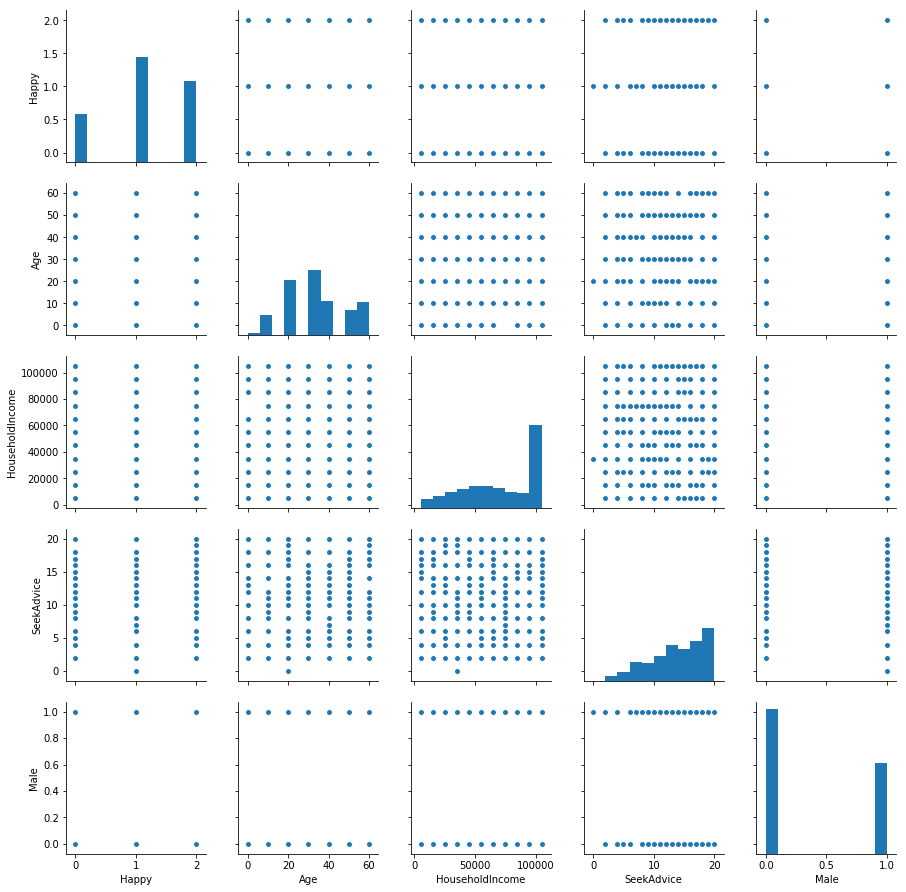

In [12]:
%matplotlib inline
sns.pairplot(plottable_df)

C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\johns\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The f

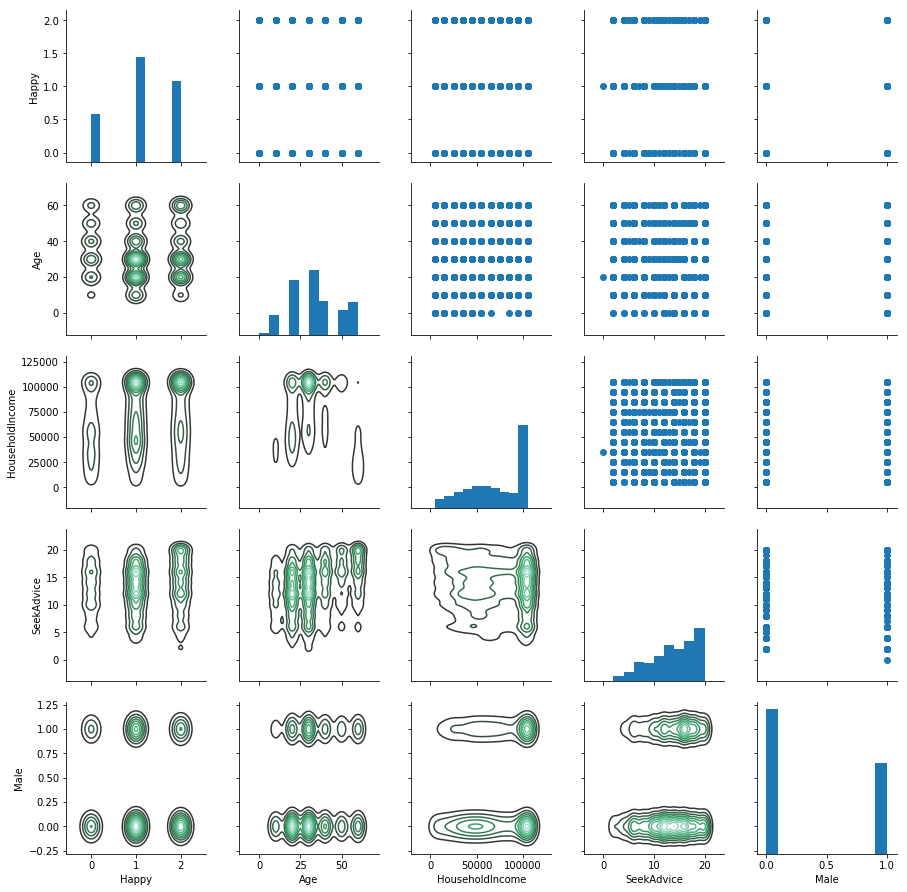

In [13]:
%matplotlib inline
g = sns.PairGrid(plottable_df)  
g.map_lower(sns.kdeplot)  # , cmap="Blues_d"
g.map_upper(plt.scatter)
g.map_diag(plt.hist)  # sns.kdeplot, lw=3

# Now let's find the secret formula to happiness!

- Let's train with the full dataset.  We're looking to create a decision tree based on the maximum amount of data.

In [14]:
# All columns except 'Happy'
input_data_df = processed_df.drop(['Happy'], axis=1)  

# Only the 'Happy' columnn
target_values_df = processed_df[['Happy']] 

- Create the classifier:

In [15]:
my_decision_tree_classifier = tree.DecisionTreeClassifier(max_depth=4)  

- Train it:

In [16]:
my_decision_tree_classifier.fit(input_data_df, target_values_df)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- Visualise it:

In [17]:
tree.export_graphviz(my_decision_tree_classifier, out_file='happiness.gv', 
                         feature_names=input_data_df.columns.values,  
                         class_names=['Unhappy', 'Neutral', 'Happy'],  # Unhappy=0, Neutral=1, Happy=2
                         filled=True, rounded=True,  
                         special_characters=True) 

View decision tree with https://dreampuf.github.io/GraphvizOnline/

# One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
    

# K Nearest Neighbours

http://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

# Principal Component Analysis

http://setosa.io/ev/principal-component-analysis/

# Try Jupyter Notebook

https://try.jupyter.org/